In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Data preparing 

In [25]:
df = pd.read_csv('processed_emails.csv')
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'].apply(lambda x: ' '.join(eval(x))))  

sequences = tokenizer.texts_to_sequences(df['text'].apply(lambda x: ' '.join(eval(x))))
max_sequence_length = 1000  
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['spam'], test_size=0.2, random_state=42)


In [26]:
print(X_test)
print(y_test)

[[  36  221   81 ...    0    0    0]
 [ 141 1645  210 ...    0    0    0]
 [2913  252    7 ...    0    0    0]
 ...
 [  19   18  478 ...    0    0    0]
 [1282  986   22 ...    0    0    0]
 [3896  186 1639 ...    0    0    0]]
4445    0
4118    0
3893    0
4210    0
5603    0
       ..
3651    0
1760    0
733     1
4698    0
4339    0
Name: spam, Length: 1146, dtype: int64


## load models to compare 

In [27]:
lstm_model_three = load_model('lstm_spam_detection_model3.h5')
bi_lstm_model= load_model('bilstm_spam_detection_model.h5')

## show models Archtecture 

In [28]:
lstm_model_three.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 50)          500000    
                                                                 
 lstm_7 (LSTM)               (None, 100)               60400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________


In [29]:
bi_lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1000, 50)          500000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 50)         0         
 ropout1D)                                                       
                                                                 
 bidirectional_1 (Bidirectio  (None, 1000, 128)        58880     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

## Evaluate Models

In [30]:

bi_loss, bi_accuracy = bi_lstm_model.evaluate(X_test, y_test)
print(f'biLSTM Test Loss: {bi_loss}')
print(f'biLSTM Test Accuracy: {bi_accuracy}')

model_3_loss, model_3_accuracy = lstm_model_three.evaluate(X_test, y_test)
print(f'Model 3 Test Loss: {model_3_loss}')
print(f'Model 3 Test Accuracy: {model_3_accuracy}')


36/36 [==============================] - 10s 234ms/step - loss: 0.2308 - accuracy: 0.9511
biLSTM Test Loss: 0.23084156215190887
biLSTM Test Accuracy: 0.9511343836784363
36/36 [==============================] - 4s 98ms/step - loss: 0.5972 - accuracy: 0.7478
Model 3 Test Loss: 0.5971712470054626
Model 3 Test Accuracy: 0.7478184700012207


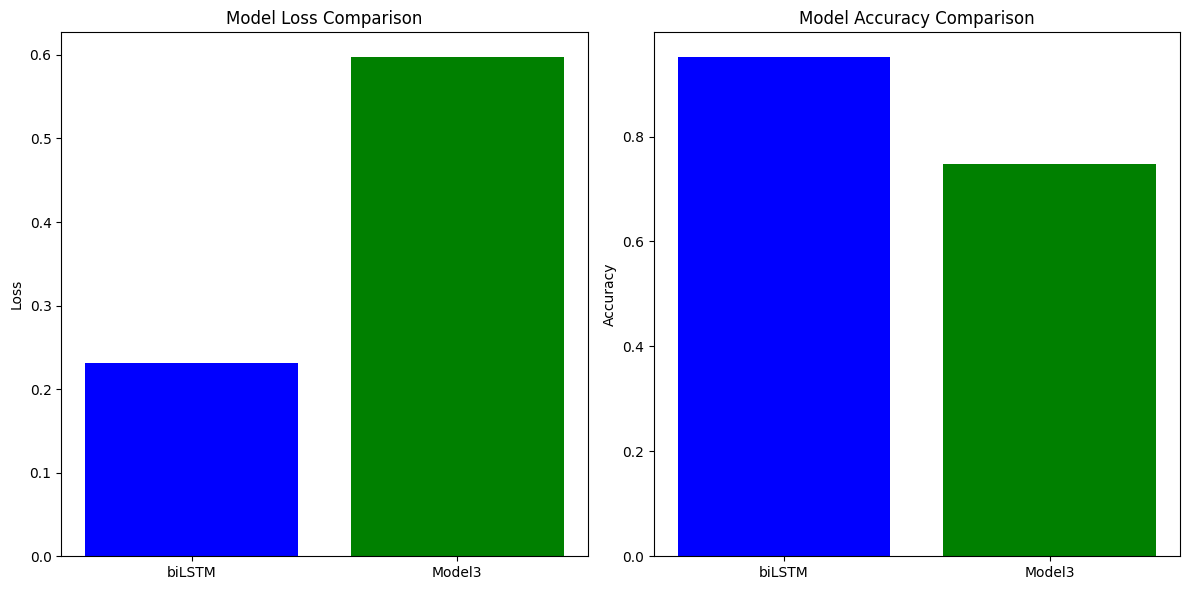

In [31]:

models = ['biLSTM', 'Model3']
losses = [bi_loss, model_3_loss]
accuracies = [bi_accuracy, model_3_accuracy]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.bar(models, losses, color=['blue', 'green'])
plt.title('Model Loss Comparison')
plt.ylabel('Loss')


plt.subplot(1, 2, 2)  
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')


plt.tight_layout()
plt.show()


## confusion matrix 

36/36 [==============================] - 9s 242ms/step


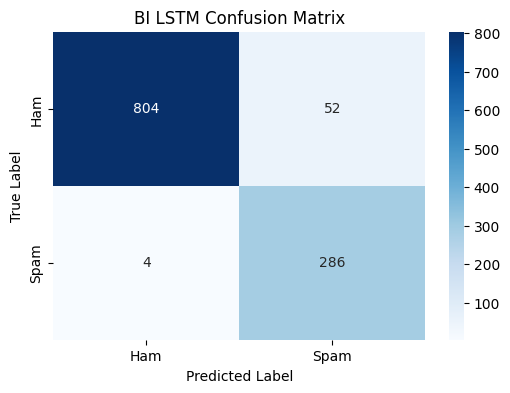

In [40]:
y_pred_bi = (bi_lstm_model.predict(X_test) > 0.5).astype("int32")
conf_matrix_bi = confusion_matrix(y_test, y_pred_bi)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bi, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BI LSTM Confusion Matrix')
plt.show()

36/36 [==============================] - 4s 103ms/step


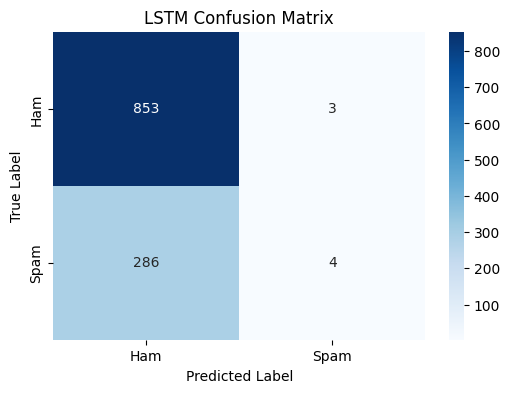

In [41]:
y_pred = (lstm_model_three.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LSTM Confusion Matrix')
plt.show()

## classfication Report

In [38]:
print("------------------------BI LSTM --------------------------")
print(classification_report(y_test, y_pred_bi))

------------------------BI LSTM --------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       856
           1       0.85      0.99      0.91       290

    accuracy                           0.95      1146
   macro avg       0.92      0.96      0.94      1146
weighted avg       0.96      0.95      0.95      1146



In [39]:
print("-------------------------- LSTM --------------------------")
print(classification_report(y_test, y_pred))

-------------------------- LSTM --------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       856
           1       0.57      0.01      0.03       290

    accuracy                           0.75      1146
   macro avg       0.66      0.51      0.44      1146
weighted avg       0.70      0.75      0.65      1146

